# Gym exercise Tracking

# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('gym_members.csv')

In [3]:
df.head(2)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.2
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.0


**Rename columns**

In [4]:
df=df.rename(columns={'Weight (kg)':'weight_kg','Height (m)':'height_m','Session_Duration (hours)':'Session_Duration_hours'})
df=df.rename(columns={'Water_Intake (liters)':'Water_Intake_liters','Workout_Frequency (days/week)':'Workout_Frequency_days'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     973 non-null    int64  
 1   Gender                  973 non-null    object 
 2   weight_kg               973 non-null    float64
 3   height_m                973 non-null    float64
 4   Max_BPM                 973 non-null    int64  
 5   Avg_BPM                 973 non-null    int64  
 6   Resting_BPM             973 non-null    int64  
 7   Session_Duration_hours  973 non-null    float64
 8   Calories_Burned         973 non-null    float64
 9   Workout_Type            973 non-null    object 
 10  Fat_Percentage          973 non-null    float64
 11  Water_Intake_liters     973 non-null    float64
 12  Workout_Frequency_days  973 non-null    int64  
 13  Experience_Level        973 non-null    int64  
 14  BMI                     973 non-null    fl

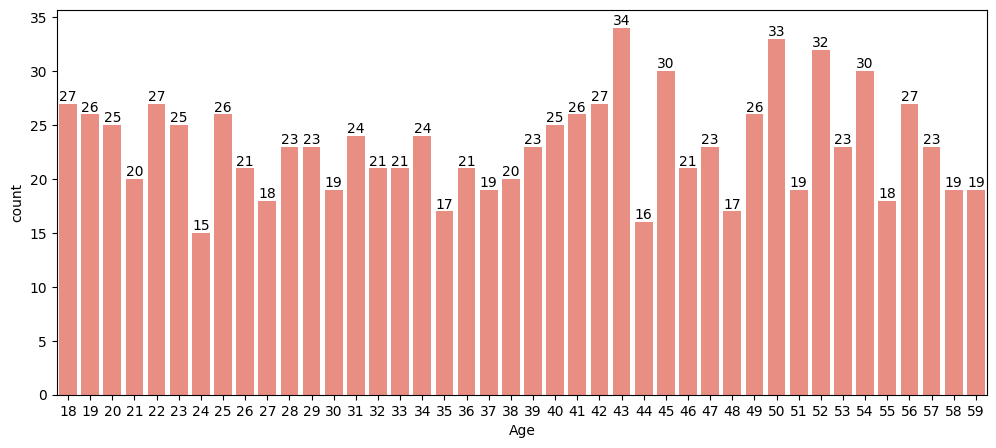

In [6]:
plt.figure(figsize=(12 ,5))
age_cnt=sns.countplot(data=df,x='Age',color='salmon')

for age in age_cnt.containers:
    age_cnt.bar_label(age)

In [7]:
mean_age=df['Age'].mean()
median_age=df['Age'].median()
mode_age=df['Age'].mode()

C:\Users\Ravi Yadav\AppData\Local\Temp\ipykernel_21248\2171405119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


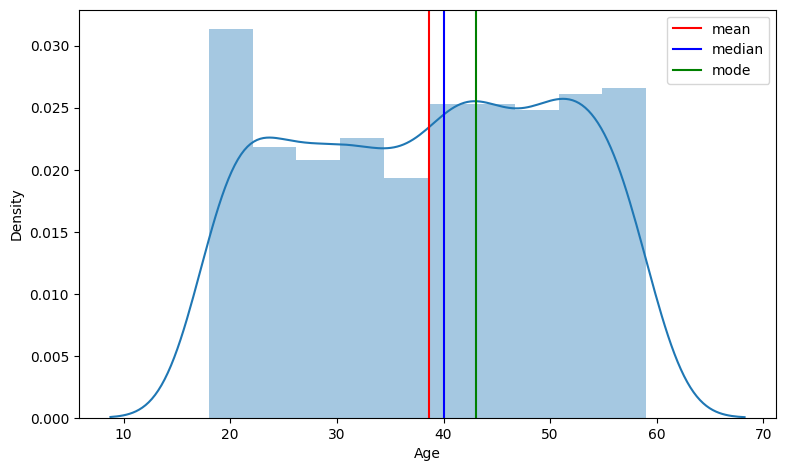

In [8]:
plt.figure(figsize=(9,5.3))
sns.distplot(df['Age'])
plt.axvline(mean_age,color='Red',label='mean')
plt.axvline(median_age,color='Blue',label='median')
plt.axvline(mode_age[0],color='Green',label='mode')
plt.legend()
plt.show()

**Note: Most of the people is below 43 years of age,and are most frequent gym Freak.**

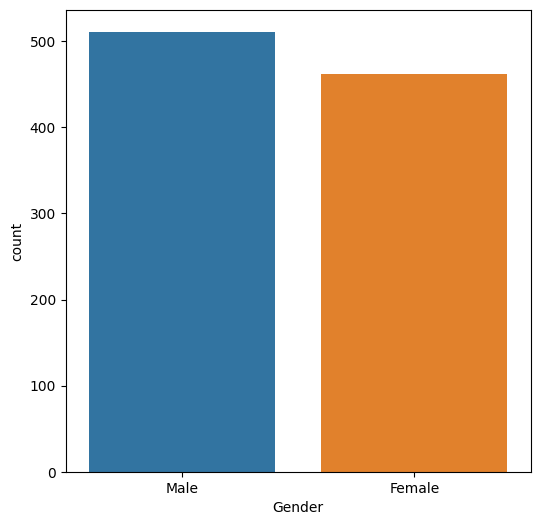

In [10]:
plt.figure(figsize=(6,6))
gender_count=sns.countplot(x=df['Gender'],hue=df['Gender'])

**Note: Male are more active then Female.**

In [9]:
#df.head(2)

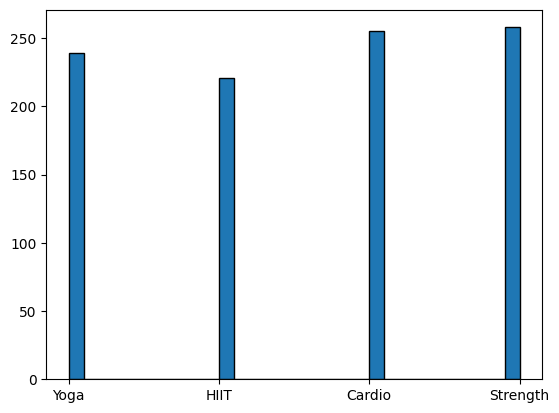

In [11]:
plt.hist(df['Workout_Type'],bins=30,edgecolor ='Black')
plt.show()

**Note: About more then 50% of people like to do Cardio and strenght.**

## Define new category 

In [12]:
df['session_category']=df['Session_Duration_hours'].apply(lambda x:'1+hours' if x >= 1 else  '1-hours')
session_counts =df['session_category'].value_counts()

In [13]:
session_counts

session_category
1+hours    787
1-hours    186
Name: count, dtype: int64

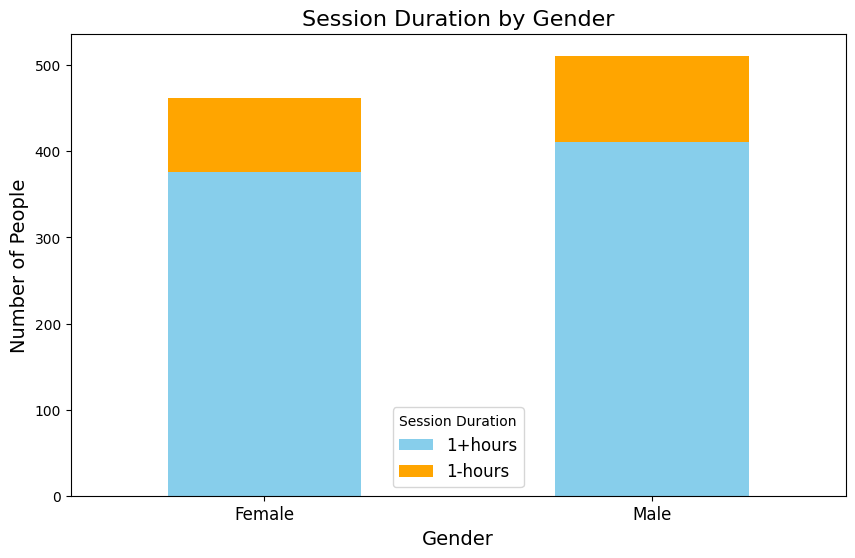

In [14]:
stacked_data = df.groupby(['Gender', 'session_category']).size().unstack()

stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange']
)
plt.title('Session Duration by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Session Duration', fontsize=12)
plt.show()


**Note: More then 80% of people do workout for then 1 hours everyday**

In [15]:
df['water_intake_category'] = df['Water_Intake_liters'].apply(lambda x:'Water_3+_Litre' if x>=3.0 else 'Water_3-Litre')
water_count=df['water_intake_category'].value_counts()

In [16]:
water_count

water_intake_category
Water_3-Litre     683
Water_3+_Litre    290
Name: count, dtype: int64

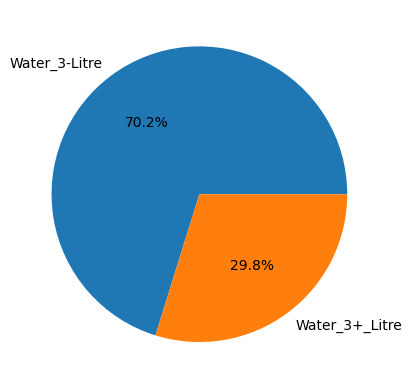

In [17]:
plt.pie(water_count,labels=water_count.index,autopct='%1.1f%%')
plt.show()

**Note: Around 30% people used to drink 3 plus liter of water everyday**

In [20]:
gender_freq = df.groupby(['Gender', 'Workout_Frequency_days']).size().unstack()

In [23]:
gender_freq

Workout_Frequency_days,2,3,4,5
Gender,,,,
Female,87,178,150,47
Male,110,190,156,55


Text(0.5, 1.0, 'Distribution of workout frequency and gender')

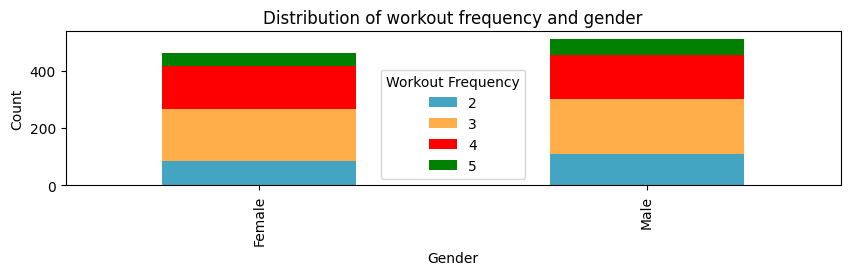

In [24]:
gender_freq.plot(kind='bar',stacked=True,figsize=(10,2), color = ["#44a5c2","#ffae49",'red','green'])
plt.ylabel('Count')
plt.legend(title='Workout Frequency', fontsize=10)
plt.title('Distribution of workout frequency and gender')

**Note: Usually Most of people workout atleast 3 to 4 day of weeks** 

In [25]:
df.head(2)

,Age,Gender,weight_kg,height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days,Experience_Level,BMI,session_category,water_intake_category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.2,1+hours,Water_3+_Litre
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.0,1+hours,Water_3-Litre


In [26]:
df['Experience_Level'].unique()

array([3, 2, 1])

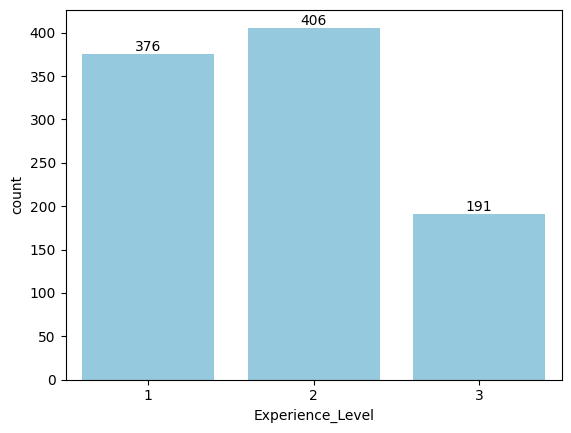

In [29]:
exp_cnt=sns.countplot(x='Experience_Level',data=df,color='skyblue')
for cnt in exp_cnt.containers:
    exp_cnt.bar_label(cnt)

**Note: Most Pepole who workout are beginner and intermediate.**

# Creating a realtionship between session, BMI, calories burned

In [30]:
cms=df[['Calories_Burned','BMI','Session_Duration_hours']]


In [31]:
correlation_matrix = cms.corr()

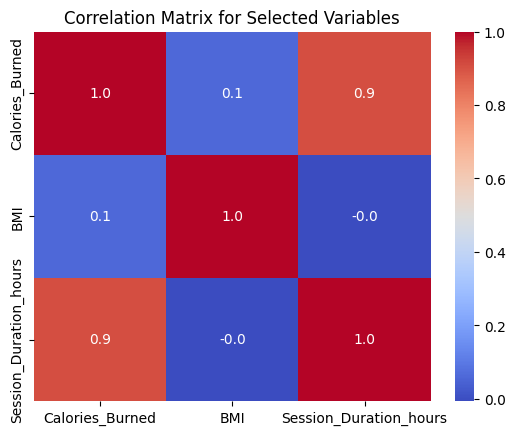

In [32]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix for Selected Variables")
plt.show()

**Note: 0.9 Calries burned and sessions durtions is postive.**

Text(0, 0.5, 'Beat per minutes')

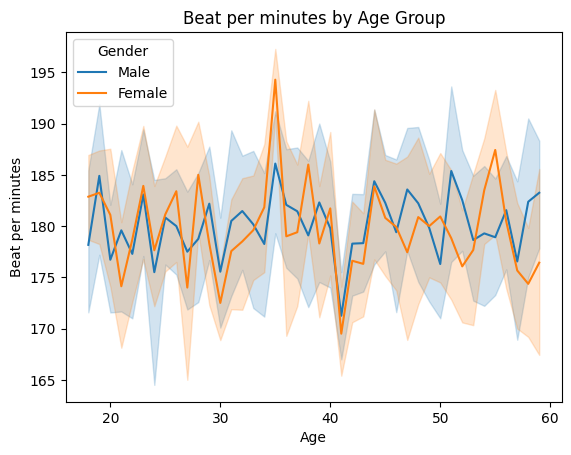

In [33]:
sns.lineplot(df,x='Age',y='Max_BPM',hue='Gender')
plt.title("Beat per minutes by Age Group")
plt.xlabel("Age")
plt.ylabel("Beat per minutes")

**Note: Beats per minutes is highest around 35 year olds Humans who workout.**


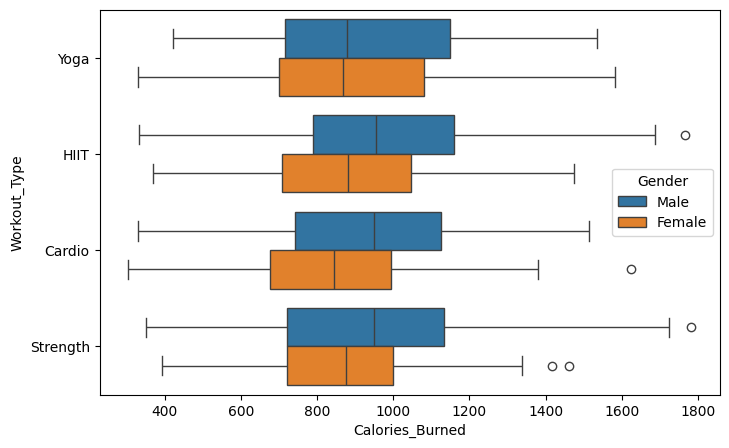

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x='Calories_Burned',y='Workout_Type', hue='Gender')
plt.show()

**Note: Strength and HIIT are burning more calories for men. Yoga is same for both male and female.**

In [35]:
df.head(2)

,Age,Gender,weight_kg,height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days,Experience_Level,BMI,session_category,water_intake_category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.2,1+hours,Water_3+_Litre
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.0,1+hours,Water_3-Litre


# Define Body fat Category In Men and women

In [45]:
fat_mean =df['Fat_Percentage'].mean()
fat_mean

np.float64(24.97677286742035)

In [37]:
fat_meadian = df['Fat_Percentage'].median()
fat_meadian

np.float64(26.2)

In [38]:
fat_mode= df['Fat_Percentage'].mode()
fat_mode

0    28.1
Name: Fat_Percentage, dtype: float64

In [39]:
fat_var= df['Fat_Percentage'].var()
fat_var

np.float64(39.180324142802164)

In [40]:
std_dev= df['Fat_Percentage'].std()
std_dev

np.float64(6.259418834269054)

In [41]:
df['Body_fat']= df['Fat_Percentage'].apply(lambda x:'High' if x>30 else 'Normal' if 18< x <=30 else 'Low')

In [42]:
df['Body_fat'].value_counts()

Body_fat
Normal    625
High      192
Low       156
Name: count, dtype: int64

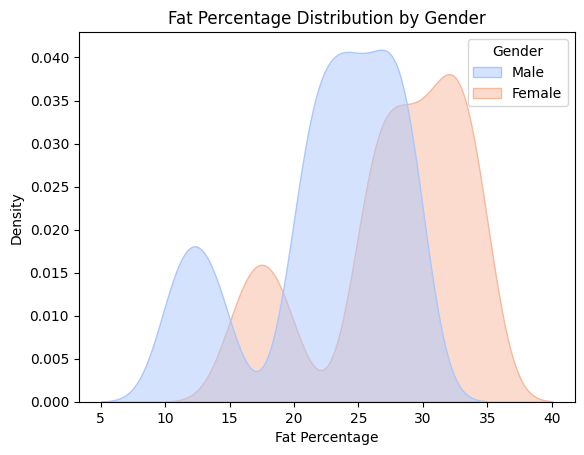

In [43]:
sns.kdeplot(data=df, x='Fat_Percentage', hue='Gender', fill=True, palette='coolwarm', alpha=0.5)
plt.title('Fat Percentage Distribution by Gender')
plt.xlabel('Fat Percentage')
plt.ylabel('Density')
plt.show()


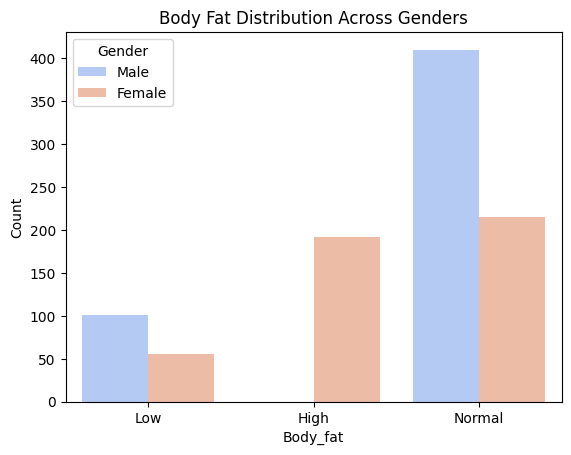

In [47]:
sns.countplot(data=df, x='Body_fat', hue='Gender', palette='coolwarm')
plt.title('Body Fat Distribution Across Genders')
plt.xlabel('Body_fat')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


**Note: In Mens there is no one with High Body Fat.**

# Thank You!!! 

# Swatantra Yadav

**E-mail: swatantra.yadav2027@gmail.com**